In [34]:
using Distributed
# using Gadfly


For fun:
https://docs.julialang.org/en/v1/manual/metaprogramming/#man-macros-1

No existen magic commands in Ijulia pero tenemos la ayuda de macros, con estas y ayuda de magics.jl de Ijulia podemos hacer que salga babu frik diciendonos hurray.

Metaprogramming:

Macros
Macros provide a method to include generated code in the final body of a program. A macro maps a tuple of arguments to a returned expression, and the resulting expression is compiled directly rather than requiring a runtime eval call. Macro arguments may include expressions, literal values, and symbols.



In [2]:
HTML("""
<head>
	<meta charset="utf-8">
	<title>Show Babu Frik </title>
	<link rel="stylesheet" href="toasty/toasty.css" />
</head>
<script src="https://code.jquery.com/jquery-1.11.2.min.js"></script>
<script src="toasty/jquery.toasty.js"></script>
""")

HTML{String}("<head>\n\t<meta charset=\"utf-8\">\n\t<title>Show Babu Frik </title>\n\t<link rel=\"stylesheet\" href=\"toasty/toasty.css\" />\n</head>\n<script src=\"https://code.jquery.com/jquery-1.11.2.min.js\"></script>\n<script src=\"toasty/jquery.toasty.js\"></script>\n")

In [3]:
macro javascript_str(s) display("text/javascript", s); end
macro hurray()
    return :(
        javascript"""
        $(document).ready( function(){
                  $("body").toasty();
                  $("body").toasty('pop');
        });
        """
    )
end

@hurray (macro with 1 method)

#### PROJECT

In [4]:
workervec = [("montecarlo@worker_1:22",1),
             ("montecarlo@worker_2:22",1),
             ("montecarlo@worker_3:22",1),
             ("montecarlo@worker_4:22",1)]

4-element Array{Tuple{String,Int64},1}:
 ("montecarlo@worker_1:22", 1)
 ("montecarlo@worker_2:22", 1)
 ("montecarlo@worker_3:22", 1)
 ("montecarlo@worker_4:22", 1)

In [5]:
addprocs(workervec; tunnel=true)

4-element Array{Int64,1}:
 2
 3
 4
 5

In [6]:
println("Number procs: $(nprocs())")
println("Number of workers: $(nworkers())")

Number procs: 5
Number of workers: 4


In [ ]:
# lo comenta agustin?
z = 0
x=0.5
y=0.5
# notamos que al darnos el bool el overload += lo cuenta como integer
println( (x*x + y*y) <=1 )
z += (x*x + y*y) <=1


In [7]:
# esta funcion debe ser igual que la de agustin
@everywhere function pointsCircle(n)
    n_in = 0
    for i=1:n
        x, y = rand(), rand()
        n_in += (x*x + y*y) <=1
    end
    return n_in
end

In [25]:
function DistributedCalc(f::Function, N::Int, workers::Int=-1)
    # f = Some function
    # n = Quantity simulations distributed
    # workers = if -1 full workers otherwise set number
    
    p = nworkers()
    if workers != -1 && workers <= p
        p = workers
    end
    println("wokers set $(p)")
    # split the simulations over the workers set
    n = round(N/p)
    
    n_in = @distributed (+) for i=1:p # reduction call
        f(n)
    end
    
    return n_in # Pi Aprox
end

DistributedCalc (generic function with 2 methods)

In [29]:
@time println( (4/10_000_000)*pointsCircle(10_000_000))

3.1411428
  0.105821 seconds (27 allocations: 976 bytes)


In [27]:
@time println( (4/1_000_000_000)*DistributedCalc(pointsCircle,1_000_000_000,-1) )
@hurray

wokers set 4


3.1416492120000004
  2.725504 seconds (650 allocations: 29.875 KiB)


In [35]:
@everywhere function f1(x)
    return x
end

In [37]:
@everywhere MC_int(f::Function,N::Int64, range::any)

    # f =  general function
    # N = maximun number of montecarlo steps
    # range = list of min and max values to define the interval
    x_min = range[1]
    x_max = range[2]

    in_integral = 0

    y_max = findmax( map(f,collect(x_min:x_max)) )
    println(y_max)

## falta terminarrrrr
end

MC_int(f1,10,[1,10])

CompositeException: On worker 2:
UndefVarError: f not defined
top-level scope at none:0
eval at ./boot.jl:331
#101 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.4/Distributed/src/process_messages.jl:290
run_work_thunk at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.4/Distributed/src/process_messages.jl:79
run_work_thunk at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.4/Distributed/src/process_messages.jl:88
#94 at ./task.jl:358

...and 4 more exception(s).


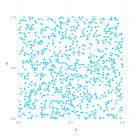

In [23]:
# Funcion anonima y broadcasting
X = (x->x[1]).(chart)
Y = (y->y[2]).(chart)

# plot with gadfly
coord = Coord.cartesian(xmin=0,xmax=1.1,ymin=0, ymax=1.1)
set_default_plot_size(14cm, 14cm)
plot(x=X[:], y=Y[:], coord, Geom.hexbin)


-----------------------------------------------

In [21]:
(x->x[2]).(chart)

999-element Array{Float64,1}:
 0.8676886425125161
 0.28252042218924456
 0.866125077403799
 0.7593749995335428
 0.037769012701019955
 0.8455738462789655
 0.6676402797918926
 0.010658073948749625
 0.10103562748931205
 0.8074999079707195
 0.010308822211022806
 0.44181135857668985
 0.28527842738665843
 ⋮
 0.09028947745121929
 0.3158636545774778
 0.6253556840949606
 0.8317597065242719
 0.6786043727730553
 0.2848578837941833
 0.7862561725778565
 0.3094325005745515
 0.10570576602274362
 0.43556080700050614
 0.06772733882463511
 0.8092147769038494

In [ ]:
X = (x->x[1]).(chart)
Y = (y->y[2]).(chart)

coord = Coord.cartesian(xmin=0,xmax=1.1,ymin=0, ymax=1.1)
set_default_plot_size(14cm, 14cm)
plot(x=X[:], y=Y[:], coord, Geom.hexbin)


2.5e10